# Fintech Assignment MPT
For the artificial data set we construct four time series, each with 1000 randomly sampled observations from a standard normal distribution. The artificial data will mimick the behavior of actual financial asset returns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)
 
# length of artificial time series
n_obs = 1000
 
# number of different assets
n_assets = 4
 
# sample Nx4 data series matrix
artificial_returns = np.random.randn(n_obs, n_assets) + 0.05
artificial_returns


array([[ 1.67434536, -0.56175641, -0.47817175, -1.02296862],
       [ 0.91540763, -2.2515387 ,  1.79481176, -0.7112069 ],
       [ 0.3690391 , -0.19937038,  1.51210794, -2.01014071],
       ...,
       [ 0.12341633,  0.46602616, -1.82920004,  0.62545885],
       [ 0.15206241,  1.23430372, -0.74484305, -0.07590305],
       [-0.9103464 , -0.79391327,  0.67834172,  0.58721449]])

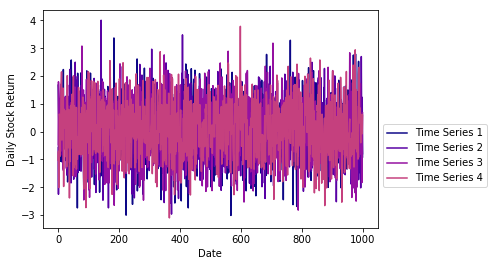

In [13]:
# get colormap
colors = plt.cm.plasma(np.linspace(0,3,20))

# plot data
for i in range(artificial_returns.shape[1]):
    plt.plot(artificial_returns.T[i], color=colors[i], label='Time Series {}'.format(i + 1));
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5));
plt.xlabel('Date');
plt.ylabel('Daily Stock Return');

plt.show()


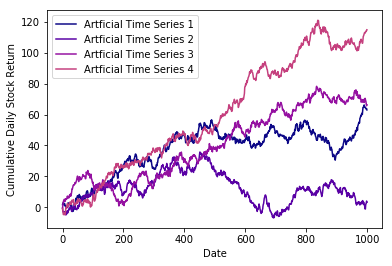

In [15]:
# get colormap
colors = plt.cm.plasma(np.linspace(0,3,20))

# plot cumulative sums
for i in range(artificial_returns.shape[1]):
    plt.plot(artificial_returns.T[i].cumsum(), color=colors[i], label='Artficial Time Series {}'.format(i + 1));
plt.legend(loc='best');
plt.xlabel('Date');
plt.ylabel('Cumulative Daily Stock Return');

plt.show()

In [2]:
import pandas_datareader as web
# define data to be downloaded
tickers = list(pd.read_csv('./data/SP100_LIST.csv', sep=';')['Symbol'])
print(tickers)
provider = 'yahoo'
start = '2010-01-01'
end = '2017-11-14'
 
# download data
#data = web.DataReader(tickers, provider, start)['Adj Close']
#read data 

data=pd.read_csv('./data/data_sp100.csv', sep=';')
 
# read data from file
data = pd.read_csv('./data/data_sp100.csv', sep=';', index_col=0, header=0, parse_dates=True)
print(data)

['AAPL', 'ABBV', 'ABT', 'ACN', 'AGN', 'AIG', 'ALL', 'AMGN', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'BRK.B', 'C', 'CAT', 'CELG', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DHR', 'DIS', 'DUK', 'DWDP', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'FOX', 'FOXA', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'ORCL', 'OXY', 'PCLN', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTN', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TWX', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'UTX', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM']
                  AAPL       ABBV        ABT         ACN         AGN  \
Date                                                                   
2009-12-31   26.986492        NaN  21.011253   34.577480   38.728325   
2010-01-04   27.406532        NaN  21.194162   35.052402   39.39318

data = web.DataReader(tickers, provider, start)['Adj Close']<Br>
data.to_csv('./data_sp100.csv', sep=';')<Br>
note: <b>Yahoo, google finance api not stable that's way i have used data_sp100.csv file</b><Br>

In [3]:
companies = ['MSFT', 'WMT', 'PG', 'GM']

In [4]:
# calculate returns
returns = data[companies] / data[companies].shift(1) - 1
returns = returns.fillna(method='ffill').dropna()
returns

,MSFT,WMT,PG,GM
Date,,,,
2010-11-19,-0.005805,0.007595,0.000469,0.002047
2010-11-22,0.001557,-0.000184,-0.007650,-0.005254
2010-11-23,-0.023708,-0.013057,-0.014946,-0.024355
2010-11-24,0.009952,0.006335,-0.000160,0.006917
2010-11-26,-0.004730,-0.004999,-0.007508,0.009558
2010-11-29,0.002376,0.002047,0.000000,0.000000
2010-11-30,-0.001976,0.004457,-0.017061,0.011834
2010-12-01,0.030879,0.011277,0.017685,0.016959
2010-12-02,0.032642,0.000914,0.003379,-0.002875


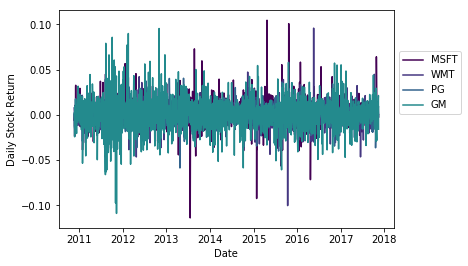

In [5]:
# get colormap
colors = plt.cm.viridis(np.linspace(0,3,20))

# plot data
for i in range(returns.shape[1]):
    plt.plot(returns.iloc[:, i], color=colors[i]);
plt.legend(loc=3, bbox_to_anchor=(1.0, 0.5));
plt.xlabel('Date');
plt.ylabel('Daily Stock Return');
plt.grid('off');

plt.show()

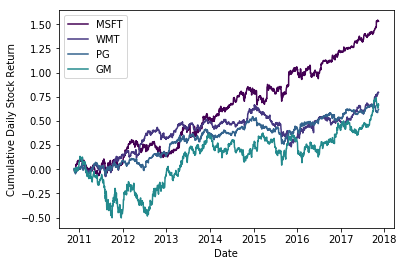

In [6]:
# get colormap viridis
colors = plt.cm.viridis(np.linspace(0,3,20))

# plot cumulative sum
for i in range(returns.shape[1]):
    plt.plot(returns.iloc[:, i].cumsum(), color=colors[i]);
plt.legend(loc='best');
plt.xlabel('Date');
plt.ylabel('Cumulative Daily Stock Return');

plt.show()

# Part 2: Modern Portfolio Theory with Python

In [7]:
def create_random_weights(n_assets):
    '''
    returns randomly choosen portfolio weights that sum to one
    '''
    w = np.random.rand(n_assets)
    return w / w.sum()

In [8]:
def evaluate_random_portfolio(returns):
    ''' 
    returns the mean and standard deviation of returns for a random portfolio
    '''
    # in case a resampler is used
    returns = pd.DataFrame(returns)   
    
    # calculate from covariance, asset returns and weights
    cov = np.matrix(returns.cov())
    R = np.matrix(returns.mean())
    w = np.matrix(create_random_weights(returns.shape[1]))
    
    # calculate expected portfolio return and risk
    mu = w * R.T
    sigma = np.sqrt(w * cov * w.T)
    
    return mu, sigma

In [9]:
def create_random_portfolios(returns, n_portfolios=1500):
    '''
    plots randomly created portfolios
    '''
    # calculate mean and std for every portfolio
    pf_mus, pf_sigmas = np.column_stack([evaluate_random_portfolio(returns) for _ in range(n_portfolios)])

    return pf_mus, pf_sigmas

In [10]:
pf_mus, pf_sigmas = create_random_portfolios(artificial_returns, n_portfolios=3000)

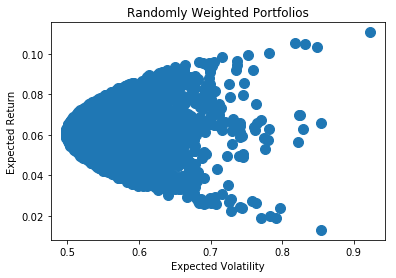

In [11]:
# scatter plot for expected return and volatility
plt.plot(pf_sigmas, pf_mus, 'o', markersize=10)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Randomly Weighted Portfolios')

plt.show()

# Part 3: Efficient Market Frontier

In [14]:
import cvxopt as opt
from cvxopt import solvers

def calculate_frontier(returns):
    '''
    returns optimal portfolio weights and corresponding sigmas for a desired optimal portfolio return
    Params:
    - returns: T x N matrix of observed data
    '''
    returns = pd.DataFrame(returns)
    cov = np.matrix(np.cov(returns.T))
    N = returns.shape[1]
    pbar = np.matrix(returns.mean())
    
    # define list of optimal / desired mus for which we'd like to find the optimal sigmas
    optimal_mus = []
    r_min = pbar.mean()    # minimum expected return
    for i in range(50):
        optimal_mus.append(r_min)
        r_min += (pbar.mean() / 100)
    
    # constraint matrices for quadratic programming
    P = opt.matrix(cov)
    q = opt.matrix(np.zeros((N, 1)))
    G = opt.matrix(np.concatenate((-np.array(pbar), -np.identity(N)), 0))
    A = opt.matrix(1.0, (1,N))
    b = opt.matrix(1.0)
    
    # hide optimization
    opt.solvers.options['show_progress'] = False
    
    # calculate portfolio weights, every weight vector is of size Nx1
    # find optimal weights with qp(P, q, G, h, A, b)
    optimal_weights = [solvers.qp(P, q, G, opt.matrix(np.concatenate((-np.ones((1, 1)) * mu, np.zeros((N, 1))), 0)), A, b)['x'] for mu in optimal_mus]
    
    # find optimal sigma
    # \sigma = w^T * Cov * w
    optimal_sigmas = [np.sqrt(np.matrix(w).T * cov.T.dot(np.matrix(w)))[0,0] for w in optimal_weights]
    
    return optimal_weights, optimal_mus, optimal_sigmas

ImportError: DLL load failed: The specified module could not be found.

In [19]:
a=np.arange(11)
b=a*2
print(a.cumsum())

[ 0  1  3  6 10 15 21 28 36 45 55]
